In [1]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter
from pdbfixer import PDBFixer
from openmm.app import PDBFile


settings = Settings(name='test_full0.5')
settings.replicates = 1
settings.gamma_range = (1,9)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = True
settings.RW_do_params = False
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "LXRa_test"


/home/alexi/Documents/ValDX


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5 already exists. Attempting t

In [2]:
### add code to read in sequence from CIF file instead of copying it manually

In [3]:
# sequence = """MSLWLGAPVPDIPPDSAVELWKPGAQDASSQAQGGSSCILREEARMPHSAGGTAGVGLEAAEPTALLTRAEPPSEPTEIR
# PQKRKKGPAPKMLGNELCSVCGDKASGFHYNVLSCEGCKGFFRRSVIKGAHYICHSGGHCPMDTYMRRKCQECRLRKCRQ
# AGMREECVLSEEQIRLKKLKRQEEEQAHATSLPPRASSPPQILPQLSPEQLGMIEKLVAAQQQCNRRSFSDRLRVTPWPM
# APDPHSREARQQRFAHFTELAIVSVQEIVDFAKQLPGFLQLSREDQIALLKTSAIEVMLLETSRRYNPGSESITFLKDFS
# YNREDFAKAGLQVEFINPIFEFSRAMNELQLNDAEFALLIAISIFSADRPNVQDQLQVERLQHTYVEALHAYVSIHHPHD
# RLMFPRMLMKLVSLRTLSSVHSEQVFALRLQDKKLPPLLSEIWDVHE"""

# # strip sequence of non letters
# sequence = ''.join([i for i in sequence if i.isalpha()])

# print(sequence)

In [4]:
# # convert sequence to FASTA format
# def write_fasta(sequence, header, file_name):
#     """
#     Writes a single-letter amino acid sequence to a FASTA file.
    
#     Parameters:
#     - sequence: A string containing the amino acid sequence.
#     - header: A string to be used as the header in the FASTA file.
#     - file_name: The name of the FASTA file to be created.
#     """
#     with open(file_name, 'w') as fasta_file:
#         # Write the header with the '>' symbol
#         fasta_file.write(f">{header}\n")
        
#         # Write the sequence in lines of 80 characters
#         for i in range(0, len(sequence), 80):
#             fasta_file.write(sequence[i:i+80] + "\n")


In [5]:
# fasta_path = os.path.join("raw_data", "LXRalpha", 'LXRa.fasta')
# write_fasta(sequence, 'LXRa', fasta_path)

In [6]:
# raw_hdx_path = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRalpha.csv"

# raw_hdx = pd.read_csv(raw_hdx_path)

In [7]:
# raw_hdx['UptakeFraction'] = raw_hdx['Uptake'] / raw_hdx['MaxUptake']

# columns_to_drop = ["Protein", "Sequence", "Fragment", "Modification", "State", "MaxUptake", "Uptake", "MHP", "Center", "Center SD", "Uptake", "Uptake SD", "RT", "RT SD"]

# raw_hdx = raw_hdx.drop(columns=columns_to_drop)

# raw_hdx.head()

In [8]:

# # pivot exposure and uptake fraction
# raw_hdx = raw_hdx.groupby(['Start', 'End', 'Exposure'])['UptakeFraction'].mean().reset_index()

# raw_hdx.head()


In [9]:

# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(raw_hdx)

In [10]:
# # conver to HDXer format ie start, end, exposure_1, exposure_2 

# # pivot so that exposure time is the column name drop the exposure column
# hdx = raw_hdx.pivot(index=['Start', 'End'], columns='Exposure', values='UptakeFraction').reset_index()

# # change Start to ResStr and End to ResEnd
# hdx = hdx.rename(columns={'Start': 'ResStr', 'End': 'ResEnd'})

# # drop the exposure column
# hdx.columns.name = None

# print(hdx)


In [11]:

# hdx = hdx.round(5)
# hdx.to_csv(os.path.join("raw_data", "LXRalpha", 'LXRa_APO.dat'), sep=' ', index=False)


In [12]:
# segs = raw_hdx[['Start', 'End']].drop_duplicates().sort_values(by=['Start', 'End']).reset_index(drop=True)


In [13]:

# # convert to list of tuples
# segs = [tuple(x) for x in segs.values]

# print(segs)


In [14]:


# # write list as new lines with space delimiter
# with open(os.path.join("raw_data", "LXRalpha", 'LXRa_APO_segs.txt'), 'w') as f:
#     for item in segs:
#         f.write("%s\n" % ' '.join(map(str, item)))

In [15]:

# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO"

# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [16]:
def pre_process_main():
    # BPTI data
    BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/LXRalpha/LXRalpha_APO"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    os.listdir(BPTI_dir)

    segs_name = "LXRa_APO_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "LXRa_APO.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)
    sim_name = 'LXRa_AF'

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]


    top_path = "/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_protonated.pdb"
    # pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    # print(top_path)
    # print(pdb_paths)


    # small_traj_name = top_path.replace(".pdb","_small.xtc")
    # small_traj_path = os.path.join(sim_dir, small_traj_name)

    # u = mda.Universe(top_path, pdb_paths)


        
    # with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
    #     for ts in u.trajectory:
    #             W.write(u.atoms)

    # # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = ["/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_protonated.xtc"]

    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [17]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_APO.dat
['LXRa_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb', 'LXRa_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb', 'LXRa_unrelaxed_rank_005_alphafold2_ptm_model_2_seed_000.pdb', 'LXRa_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000.pdb', 'LXRa_unrelaxed_rank_001_alphafold2_ptm_model_4_seed_000.pdb']
['/home/alexi/Documents/ValDX/raw_data/LXRalpha/LXRalpha_APO/LXRa_protonated.xtc']


In [18]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [19]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [20]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [21]:
# combined_analysis_dump, names, save_paths = VDX.run_benchmark_ensemble(system=test_name,
#                                                                         times=[0.5,10.0],
#                                                                         expt_name=expt_name,
#                                                                         n_reps=2,
#                                                                         split_modes=['r','s','R3'],
#                                                                         RW=True,
#                                                                         hdx_path=hdx_path,
#                                                                         segs_path=segs_path,
#                                                                         traj_paths=traj_paths,
#                                                                         top_path=top_path)

                                                                        

In [22]:
settings.replicates

1

Coords shape
(110, 1341)
Performing PCA
Transformed data
(110, 2)
Fitting KMeans


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Getting cluster centers
(88, 2)
Getting cluster labels
(110,)
Unique labels
(88,)
Cluster frames
[53, 87, 1, 26, 10, 35, 66, 57, 100, 33, 65, 103, 47, 30, 38, 56, 78, 64, 83, 29, 49, 36, 19, 71, 6, 75, 89, 17, 34, 14, 2, 12, 106, 27, 82, 4, 95, 73, 105, 45, 43, 101, 51, 68, 48, 37, 28, 94, 20, 44, 62, 99, 93, 92, 31, 23, 7, 40, 76, 32, 25, 61, 39, 46, 63, 59, 52, 72, 84, 107, 90, 9, 96, 21, 58, 11, 55, 50, 102, 15, 74, 104, 0, 54, 77, 8, 81, 16]
88
Cluster weights
[0.8 0.8 1.6 0.8 0.8 1.6 1.6 1.6 3.2 0.8 0.8 0.8 0.8 0.8 0.8 1.6 0.8 0.8
 0.8 0.8 0.8 0.8 0.8 0.8 2.4 0.8 0.8 1.6 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8
 0.8 0.8 1.6 0.8 1.6 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 1.6 1.6 0.8 0.8 0.8
 0.8 1.6 1.6 0.8 0.8 0.8 0.8 1.6 0.8 1.6 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8
 0.8 1.6 1.6 0.8 0.8 0.8 0.8 0.8 0.8 1.6 0.8 0.8 0.8 0.8 0.8 0.8]
(88,)


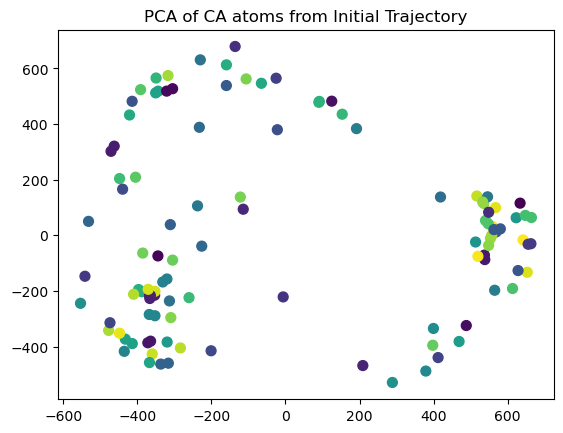

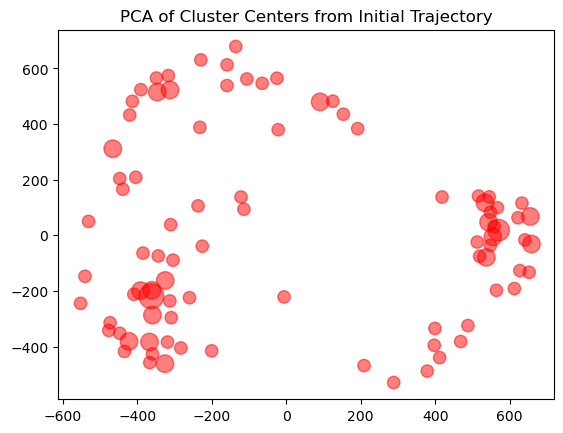

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5 already exists. Attempting t

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degr

/home/alexi/Documents/ValDX/data/test_full0.522/train_LXRa_test_1/reweighting_gamma_1x10^0/home/alexi/Documents/ValDX/data/test_full0.522/train_LXRa_test_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/test_full0.522/train_LXRa_test_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/test_full0.522/train_LXRa_test_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/test_full0.522/train_LXRa_test_1/reweighting_gamma_5x10^0
/home/alexi/Documents/ValDX/data/test_full0.522/train_LXRa_test_1/reweighting_gamma_6x10^0/home/alexi/Documents/ValDX/data/test_full0.522/train_LXRa_test_1/reweighting_gamma_7x10^0/home/alexi/Documents/ValDX/data/test_full0.522/train_LXRa_test_1/reweighting_gamma_8x10^0






Contacts readContacts readContacts readContacts readContacts read




Hbonds readContacts readHbonds readHbonds readHbonds readContacts readContacts read

Hbonds read





Hbonds readHbonds read
Hbonds read

Segments and experimental dfracs readSegments and experimental d

/home/alexi/Documents/ValDX/ValDX/reweighting.py:468: RuntimeWarning: invalid value encountered in divide
  self.runvalues['currweights'] = self.runvalues['currweights'] / np.sum(self.runvalues['currweights'])
/home/alexi/Documents/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/home/alexi/Documents/ValDX/ValDX/reweighting.py:839: RuntimeWarning: invalid value encountered in scalar divide
  ave_deviation = np.sum(np.abs(target_lambdas)) / np.sum(gamma_target_lambdas != 0)
/home/alexi/Documents/ValDX/ValDX/reweighting.py:468: RuntimeWarning: invalid value encountered in divide
  self.runvalues['currweights'] = self.runvalues['currweights'] / np.sum(self.runvalues['currweights'])
/home/alexi/Documents/ValDX/ValDX/reweighting.py:503: RuntimeWarning: Mean of empty slice
  _curr_segment_dfracs = np.nanmean(self.runvalues['curr_residue_dfracs'], axis=1)
/home/alexi/Documents/ValDX/ValDX/re

In [23]:
combined_analysis_dump, names, save_paths = VDX.run_refine_ensemble(system=test_name,
                                                                    times=[0.5,10.0],
                                                                    expt_name=expt_name,
                                                                    n_reps=2,
                                                                    split_mode=['R3'],
                                                                    hdx_path=hdx_path,
                                                                    segs_path=segs_path,
                                                                    traj_paths=traj_paths,
                                                                    top_path=top_path)
                                                                    

In [ ]:
# combined_analysis_dump, names, save_paths = VDX.run_refine_ensemble(system=test_name,
#                                                                     times=[0.5,10.0],
#                                                                     expt_name=expt_name,
#                                                                     n_reps=3,
#                                                                     split_mode=['R3'],
#                                                                     hdx_path=hdx_path,
#                                                                     segs_path=segs_path,
#                                                                     traj_paths=traj_paths,
#                                                                     top_path=top_path)
                                                                    

In [ ]:
# def run_split_test(split_mode, name, system):

#     # settings.split_mode = 'R'
#     settings.split_mode = split_mode
#     settings.name = "_".join([name, split_mode])
#     settings.times = [0.5,10.0]
#     VDX = ValDXer(settings)

#     VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
#     # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

#     VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

#     run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
#     analysis_dump, df, name = VDX.dump_analysis()
#     save_path = VDX.save_experiment()

#     return run_outputs, analysis_dump, df, name, save_path

In [ ]:

# splits = ['S', 'SR', 'Sp']
# split_names = ['AvsB', 'LvsX', 'mixAandB']
# system = 'BPTITtut_test'

# raw_run_outputs = {}
# analysis_dumps = {}
# analysis_df = pd.DataFrame()
# names = []
# save_paths = []


# for split, split_name in zip(splits, split_names):
#     run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
#     raw_run_outputs[name] = run_outputs
#     analysis_dumps.update(analysis_dump)
#     analysis_df = pd.concat([analysis_df, df])
#     names.append(name)
#     save_paths.append(save_path)



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# from MDAnalysis.analysis.dssp import DSSP



In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

